# Gradient Boosting Regression with scikit-learn
_A comprehensive tutorial using the California Housing dataset_

Author: Shrey Nayak

---

## Objectives
- Understand the concept of **Gradient Boosting Regression**.
- Implement `GradientBoostingRegressor` in scikit-learn.
- Compare performance with Decision Tree and Random Forest.
- Interpret feature importances.
- Perform hyperparameter tuning to optimize the model.


## 1. Introduction to Gradient Boosting Regression

Gradient Boosting is an **ensemble method** that builds models **sequentially** to correct the errors of the previous models.

---

### How it Works
1. Start with an initial prediction (often the mean of the target values).
2. Fit a weak learner (usually a shallow decision tree) to the **residual errors** (the difference between predicted and actual values).
3. Add this weak learner to the model with a learning rate that scales its contribution.
4. Repeat steps 2–3 for a set number of iterations (`n_estimators`).

---

### Why it Works
- Each model learns from the **mistakes** of the previous ones.
- Gradually reduces bias by improving predictions.
- Works well on both regression and classification tasks.

---

### Key Parameters in scikit-learn's `GradientBoostingRegressor`
- `n_estimators`: Number of boosting stages.
- `learning_rate`: Controls contribution of each tree.
- `max_depth`: Depth of individual trees (affects bias/variance).
- `subsample`: Fraction of samples used for fitting each tree.
- `loss`: Loss function to be optimized (default: least squares).
- `max_features`: Number of features to consider at each split.

---

### Advantages
- Often more accurate than bagging methods for structured/tabular data.
- Handles both numerical and categorical features (with preprocessing).
- Can be regularized to prevent overfitting.

### Disadvantages
- More sensitive to hyperparameter tuning.
- Slower to train than Random Forest.
- Less interpretable than simple models.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Show first 5 rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dataset shape: (20640, 9)

Dataset description:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532

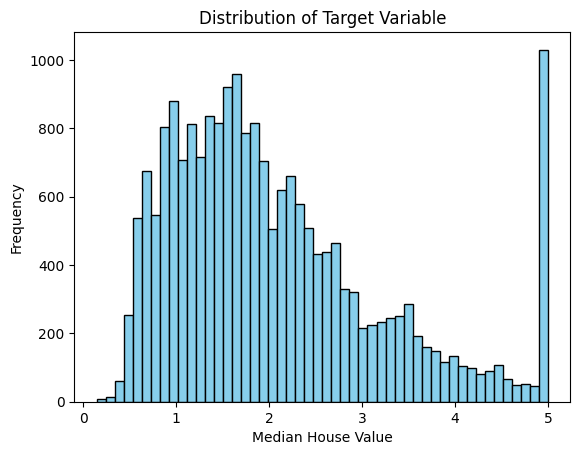

In [3]:
print("Dataset shape:", df.shape)
print("\nDataset description:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())

# Visualize target distribution
plt.hist(df['MedHouseVal'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable")
plt.show()


In [4]:
# Separate features and target
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardization (optional for tree-based models, but kept for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Initialize Gradient Boosting model
gbr = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)

# Train the model
gbr.fit(X_train_scaled, y_train)

# Predictions
y_pred_gbr = gbr.predict(X_test_scaled)

# Evaluation
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting RMSE: {rmse_gbr:.3f}")
print(f"Gradient Boosting R² Score: {r2_gbr:.3f}")


Gradient Boosting RMSE: 0.511
Gradient Boosting R² Score: 0.800


In [6]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Decision Tree -> RMSE: {rmse_dt:.3f}, R²: {r2_dt:.3f}")
print(f"Random Forest -> RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}")
print(f"Gradient Boost -> RMSE: {rmse_gbr:.3f}, R²: {r2_gbr:.3f}")


Decision Tree -> RMSE: 0.706, R²: 0.620
Random Forest -> RMSE: 0.506, R²: 0.805
Gradient Boost -> RMSE: 0.511, R²: 0.800


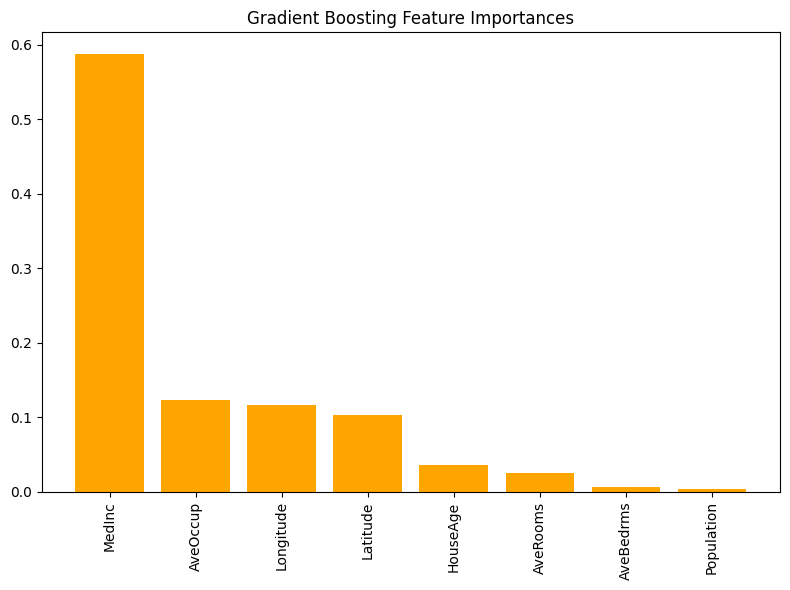

In [7]:
# Feature importances
importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(8,6))
plt.title("Gradient Boosting Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='orange')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [8]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score from CV:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best R² Score from CV: 0.8321298084178474


## Conclusion

- Gradient Boosting Regression achieved strong predictive performance compared to Decision Tree and Random Forest.
- By sequentially correcting errors of previous trees, it reduced bias and improved accuracy.
- Feature importance analysis showed which variables had the biggest impact on predictions.
- Hyperparameter tuning (learning rate, depth, n_estimators) is essential for optimal performance.

**Advantages:**
- High accuracy for structured/tabular data.
- Can be regularized to prevent overfitting.
- Works well with relatively small datasets.

**Limitations:**
- Slower to train than Random Forest.
- Sensitive to hyperparameters.
- Less interpretable than single trees.

**Next Steps:**
- Try Gradient Boosting on datasets with different characteristics.
- Compare with XGBoost, LightGBM, and CatBoost for potential speed/accuracy gains.
